In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AirPassengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [17]:
data.shape

(144, 2)

<Axes: xlabel='Month'>

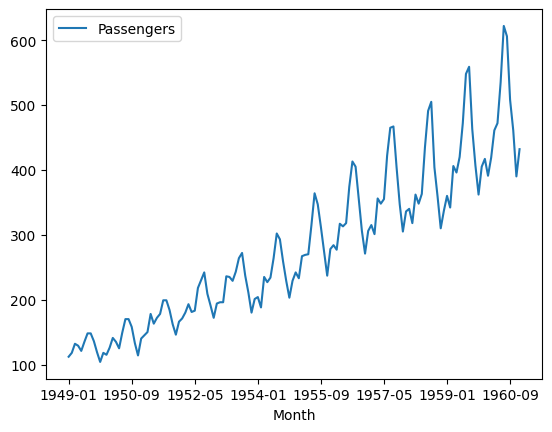

In [18]:
data.plot(x="Month", y="Passengers")

In [19]:
training_data = data.iloc[:115, 1:2].values
test_data = data.iloc[115:, 1:2]

In [31]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range = (0,1))
training_set_scaled = scaler.fit_transform(training_data)

x_train = []
y_train = []
x = 5

for i in range(x, 115):
    x_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[1,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [32]:
x_train.shape

(110, 5, 1)

In [34]:
x_train_new = np.reshape(x_train, (110,5))

In [35]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
modelknn=neigh.fit(x_train_new, y_train)

In [36]:
dataset_train = data.iloc[:115, 1:2]
dataset_test = data.iloc[115:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)

In [37]:
inputs =scaler.fit_transform(inputs)
X_test = []
for i in range(5, 45):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (40,) + inhomogeneous part.

In [25]:
X_test.shape

(40, 5, 1)

In [26]:
x_test_new = np.reshape(X_test, (40, 5))

In [27]:
predicted_passenger = modelknn.predict(x_test_new)

predicted_passenger = predicted_passenger.reshape(-1,1)
prediksi= scaler.inverse_transform(predicted_passenger)
dataset_test
dataset_test=dataset_test.iloc[0:40]
dataset_test.shape

(40, 1)

In [28]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.22994171313201525

In [29]:
dataset_test=dataset_test.to_numpy()

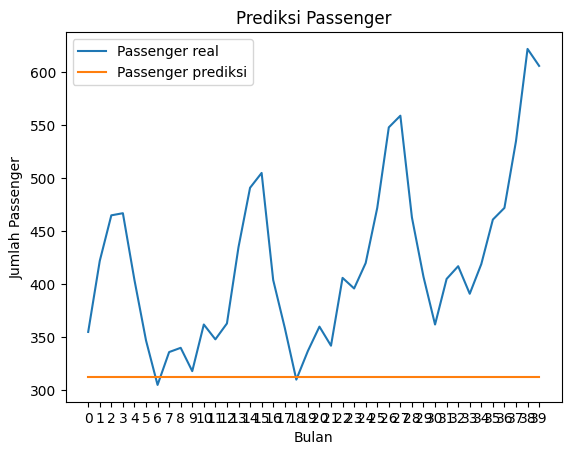

In [30]:
import matplotlib.pyplot as plt
plt.plot(dataset_test,label = 'Passenger real')
plt.plot(prediksi,label = 'Passenger prediksi')
plt.xticks(np.arange(0,40,1))
plt.title('Prediksi Passenger')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Passenger')
plt.legend()
plt.show()

plt.show()